# GAN Model -Training

## Libraries

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import types

from models.MuseGAN import MuseGAN
from utils.loaders import load_music

from music21 import midi
from music21 import note, stream, duration



Using TensorFlow backend.


## Parameters initialization

In [2]:

parent_folder = 'New_Music'    #Set up the data folders
run_num = '0001'
track_name1 = 'chorales'
file_name = 'Jsb16thSeparated.npz'
folder_in = 'run/{}/'.format(parent_folder)
folder_in += '_'.join([run_num, track_name1])



if not os.path.exists(folder_in):
    os.mkdir(folder_in)
    os.mkdir(os.path.join(folder_in, 'vizualizations'))
    os.mkdir(os.path.join(folder_in, 'images'))
    os.mkdir(os.path.join(folder_in, 'weights_record'))
    os.mkdir(os.path.join(folder_in, 'data_storage'))

mode =  'load' 
batch_in = 64
bars_num = 2
time_steps_per_bar = 16
n_notes = 84
num_of_tracks = 4

binary_data, data_code, raw = load_music(track_name1, file_name, bars_num, time_steps_per_bar)
binary_data = np.squeeze(binary_data)

## Architecture of the model

In [3]:
gan_model = MuseGAN(input_dim = binary_data.shape[1:]
        , critic_learning_rate = 0.001
        , generator_learning_rate = 0.001
        , optimiser = 'adam'
        , grad_weight = 10
        , z_dim = 32
        , batch_size = batch_in
        , n_tracks = num_of_tracks
        , n_bars = bars_num
        , n_steps_per_bar = time_steps_per_bar
        , n_pitches = n_notes
        )

if mode == 'load':
    gan_model.save(folder_in)
else:                 
    gan_model.load_weights(folder_in)

W0505 18:44:31.115425  4876 deprecation_wrapper.py:119] From C:\Users\Arjun\anaconda3\envs\generative\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0505 18:44:31.131421  4876 deprecation_wrapper.py:119] From C:\Users\Arjun\anaconda3\envs\generative\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0505 18:44:31.132424  4876 deprecation_wrapper.py:119] From C:\Users\Arjun\anaconda3\envs\generative\lib\site-packages\keras\backend\tensorflow_backend.py:4115: The name tf.random_normal is deprecated. Please use tf.random.normal instead.

W0505 18:44:31.315423  4876 deprecation_wrapper.py:119] From C:\Users\Arjun\anaconda3\envs\generative\lib\site-packages\keras\backend\tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session inst

In [4]:
gan_model.chords_tempNetwork.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
temporal_input (InputLayer)  (None, 32)                0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 1, 1, 32)          0         
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 2, 1, 1024)        66560     
_________________________________________________________________
batch_normalization_1 (Batch (None, 2, 1, 1024)        4096      
_________________________________________________________________
activation_1 (Activation)    (None, 2, 1, 1024)        0         
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 2, 1, 32)          32800     
_________________________________________________________________
batch_normalization_2 (Batch (None, 2, 1, 32)          128       
__________

In [5]:
gan_model.barGen[0].summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bar_generator_input (InputLa (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              132096    
_________________________________________________________________
batch_normalization_11 (Batc (None, 1024)              4096      
_________________________________________________________________
activation_11 (Activation)   (None, 1024)              0         
_________________________________________________________________
reshape_11 (Reshape)         (None, 2, 1, 512)         0         
_________________________________________________________________
conv2d_transpose_11 (Conv2DT (None, 4, 1, 512)         524800    
_________________________________________________________________
batch_normalization_12 (Batc (None, 4, 1, 512)         2048      
__________

In [6]:
gan_model.generator.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
melody_input (InputLayer)       (None, 4, 32)        0                                            
__________________________________________________________________________________________________
chords_input (InputLayer)       (None, 32)           0                                            
__________________________________________________________________________________________________
lambda_1 (Lambda)               (None, 32)           0           melody_input[0][0]               
__________________________________________________________________________________________________
lambda_2 (Lambda)               (None, 32)           0           melody_input[0][0]               
__________________________________________________________________________________________________
lambda_3 (

In [7]:
gan_model.critic.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
critic_input (InputLayer)    (None, 2, 16, 84, 4)      0         
_________________________________________________________________
conv3d_1 (Conv3D)            (None, 1, 16, 84, 128)    1152      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 1, 16, 84, 128)    0         
_________________________________________________________________
conv3d_2 (Conv3D)            (None, 1, 16, 84, 128)    16512     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 1, 16, 84, 128)    0         
_________________________________________________________________
conv3d_3 (Conv3D)            (None, 1, 16, 7, 128)     196736    
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 1, 16, 7, 128)     0         
__________

## GAN train

In [8]:

EPOCHS = 60
PRINT_EVERY_N_BATCHES = 10

gan_model.epoch = 0

In [9]:
gan_model.train(     
    binary_data
    , batch_size = batch_in
    , epochs = EPOCHS
    , run_folder = folder_in
    , print_every_n_batches = PRINT_EVERY_N_BATCHES
)

C:\Users\Arjun\anaconda3\envs\generative\lib\site-packages\keras\engine\training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
W0505 18:44:46.123425  4876 deprecation.py:323] From C:\Users\Arjun\anaconda3\envs\generative\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
C:\Users\Arjun\anaconda3\envs\generative\lib\site-packages\keras\engine\training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


0 (5, 1) [D loss: (9.3)(R -0.5, F -0.0, G 1.0)] [G loss: 0.1]


C:\Users\Arjun\anaconda3\envs\generative\lib\site-packages\keras\engine\training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


1 (5, 1) [D loss: (-190.4)(R -264.5, F 44.9, G 2.9)] [G loss: -29.5]
2 (5, 1) [D loss: (-210.9)(R -592.0, F 161.7, G 21.9)] [G loss: -143.1]
3 (5, 1) [D loss: (-162.3)(R -439.5, F 151.8, G 12.5)] [G loss: -127.1]
4 (5, 1) [D loss: (-113.3)(R -205.8, F 20.8, G 7.2)] [G loss: 58.2]
5 (5, 1) [D loss: (-72.8)(R -301.6, F 174.2, G 5.5)] [G loss: -180.2]
6 (5, 1) [D loss: (-48.6)(R -104.6, F 36.9, G 1.9)] [G loss: 448.3]
7 (5, 1) [D loss: (-26.1)(R -156.6, F 125.7, G 0.5)] [G loss: -191.8]
8 (5, 1) [D loss: (-10.6)(R -155.2, F 144.0, G 0.1)] [G loss: -153.0]
9 (5, 1) [D loss: (-2.4)(R -124.1, F 121.7, G 0.0)] [G loss: -122.3]
10 (5, 1) [D loss: (3.6)(R -79.9, F 82.5, G 0.1)] [G loss: -82.9]
11 (5, 1) [D loss: (3.6)(R -65.2, F 67.6, G 0.1)] [G loss: -68.1]
12 (5, 1) [D loss: (4.8)(R -36.7, F 39.8, G 0.2)] [G loss: -37.1]
13 (5, 1) [D loss: (7.3)(R -8.9, F 12.0, G 0.4)] [G loss: -9.9]
14 (5, 1) [D loss: (4.5)(R 0.3, F 1.4, G 0.3)] [G loss: -0.1]
15 (5, 1) [D loss: (1.0)(R 0.8, F 0.2, G 0.0)] [

#######

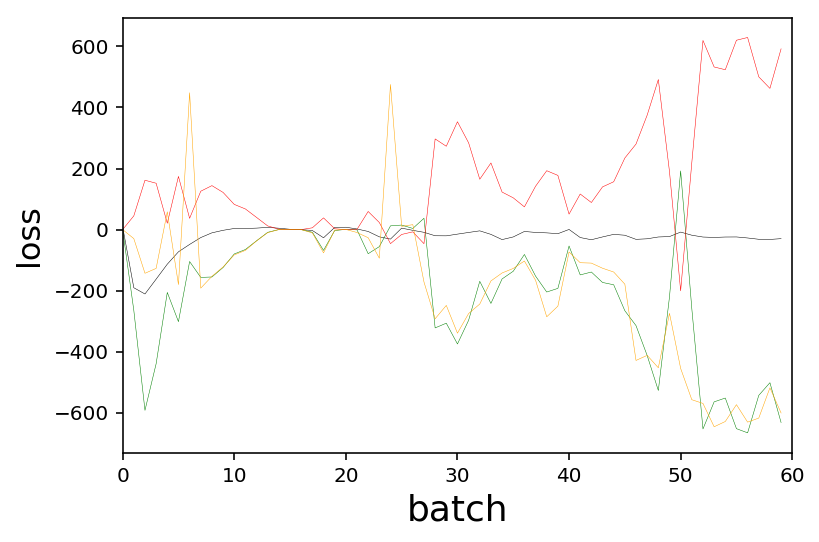

In [10]:
fig = plt.figure()
plt.plot([x[0] for x in gan_model.d_losses], color='black', linewidth=0.25)

plt.plot([x[1] for x in gan_model.d_losses], color='green', linewidth=0.25)
plt.plot([x[2] for x in gan_model.d_losses], color='red', linewidth=0.25)
plt.plot(gan_model.g_losses, color='orange', linewidth=0.25)

plt.xlabel('batch', fontsize=18)
plt.ylabel('loss', fontsize=16)

plt.xlim(0, len(gan_model.d_losses))
# plt.ylim(0, 2)

plt.show()
